# City as a Graph

this notebook aims to load cadastral data and interpret buildings and roads as a graph

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
import pandas as pd

import geopandas as gpd
import fiona
import shapely

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# params
src = r"../../../../../../../SyntheticCitiesData/"

## Load Cadastral Data

In [4]:
georoa = gpd.read_file(src + "av_lv95/geopackage/av_lv95.gpkg", layer = "soli") # roads
geolcf = gpd.read_file(src + "av_lv95/geopackage/av_lv95.gpkg", layer = "lcsf") # surface
# geocad.hplot(figsize = (30, 20));

In [5]:
georoa.columns

Index(['BFSNr', 'Gueltigkeit', 'Art', 'Qualitaet', 'Kanton', 'geometry'], dtype='object')

<Axes: >

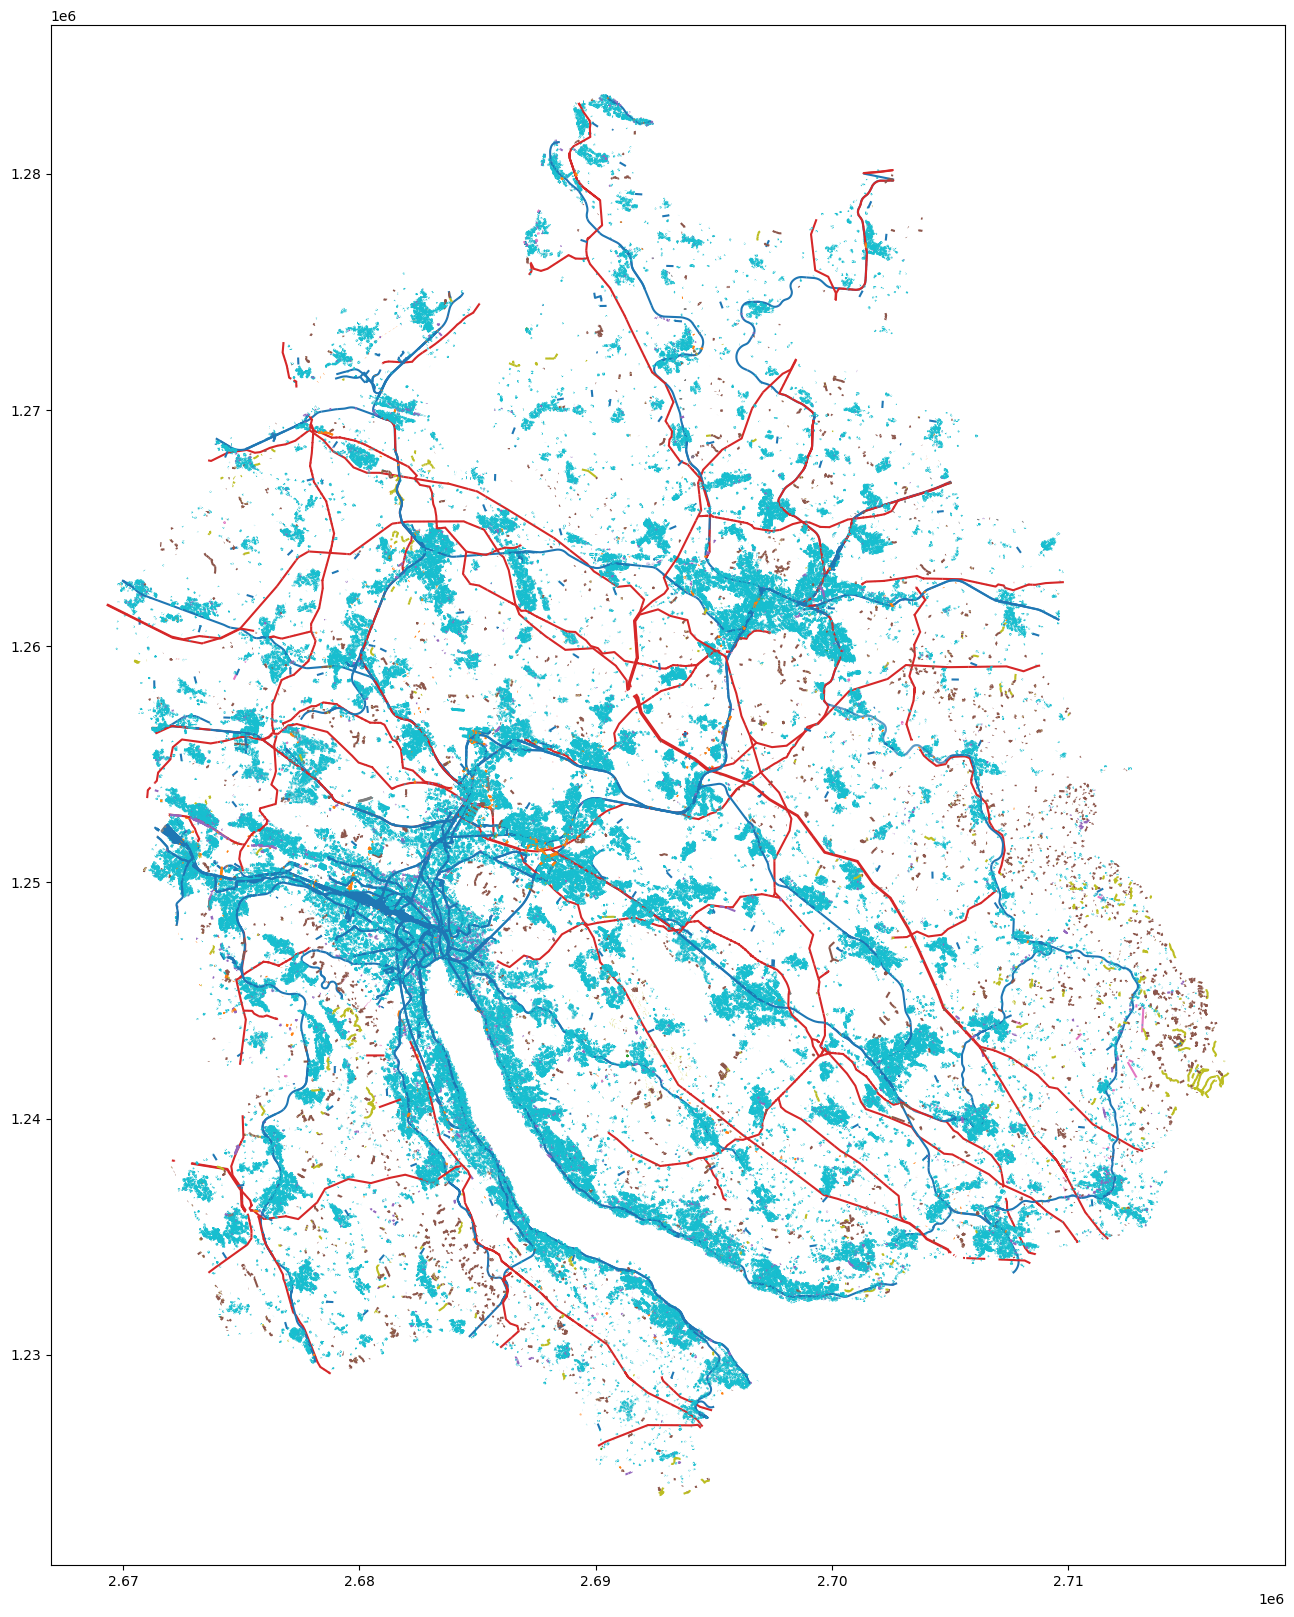

In [9]:
georoa.plot(column = "Art", figsize=(30,20))

In [6]:
geobrd = gpd.read_file(src + "swissBOUNDARIES3D_1_5_LV95_LN02.gdb/",  driver='FileGDB', layer = "TLM_HOHEITSGEBIET")
geozhc = geobrd.loc[geobrd.BFS_NUMMER == 261] # selecting Zuerich geometry to simplify the experiment

C:\Users\furio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pyogrio\raw.py:198: RuntimeWarning: driver OpenFileGDB does not support open option DRIVER
  return ogr_read(


## Selecting only the geometries in the municipality Zürich

In [7]:
geolcfzh = gpd.sjoin(geolcf, geozhc, how='inner', predicate='within')
geolcfzh = geolcfzh.drop(['index_right'], axis=1)

# georoazh = gpd.sjoin(georoa, geozhc, how='inner', predicate='within')
# georoazh = georoazh.drop(['index_right'], axis=1)

C:\Users\furio\AppData\Local\Temp\ipykernel_12696\4192280453.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:2056
Right CRS: COMPD_CS["CH1903+ / LV95 + LN02 height",PROJCS["CH ...

  geolcfzh = gpd.sjoin(geolcf, geozhc, how='inner', predicate='within')


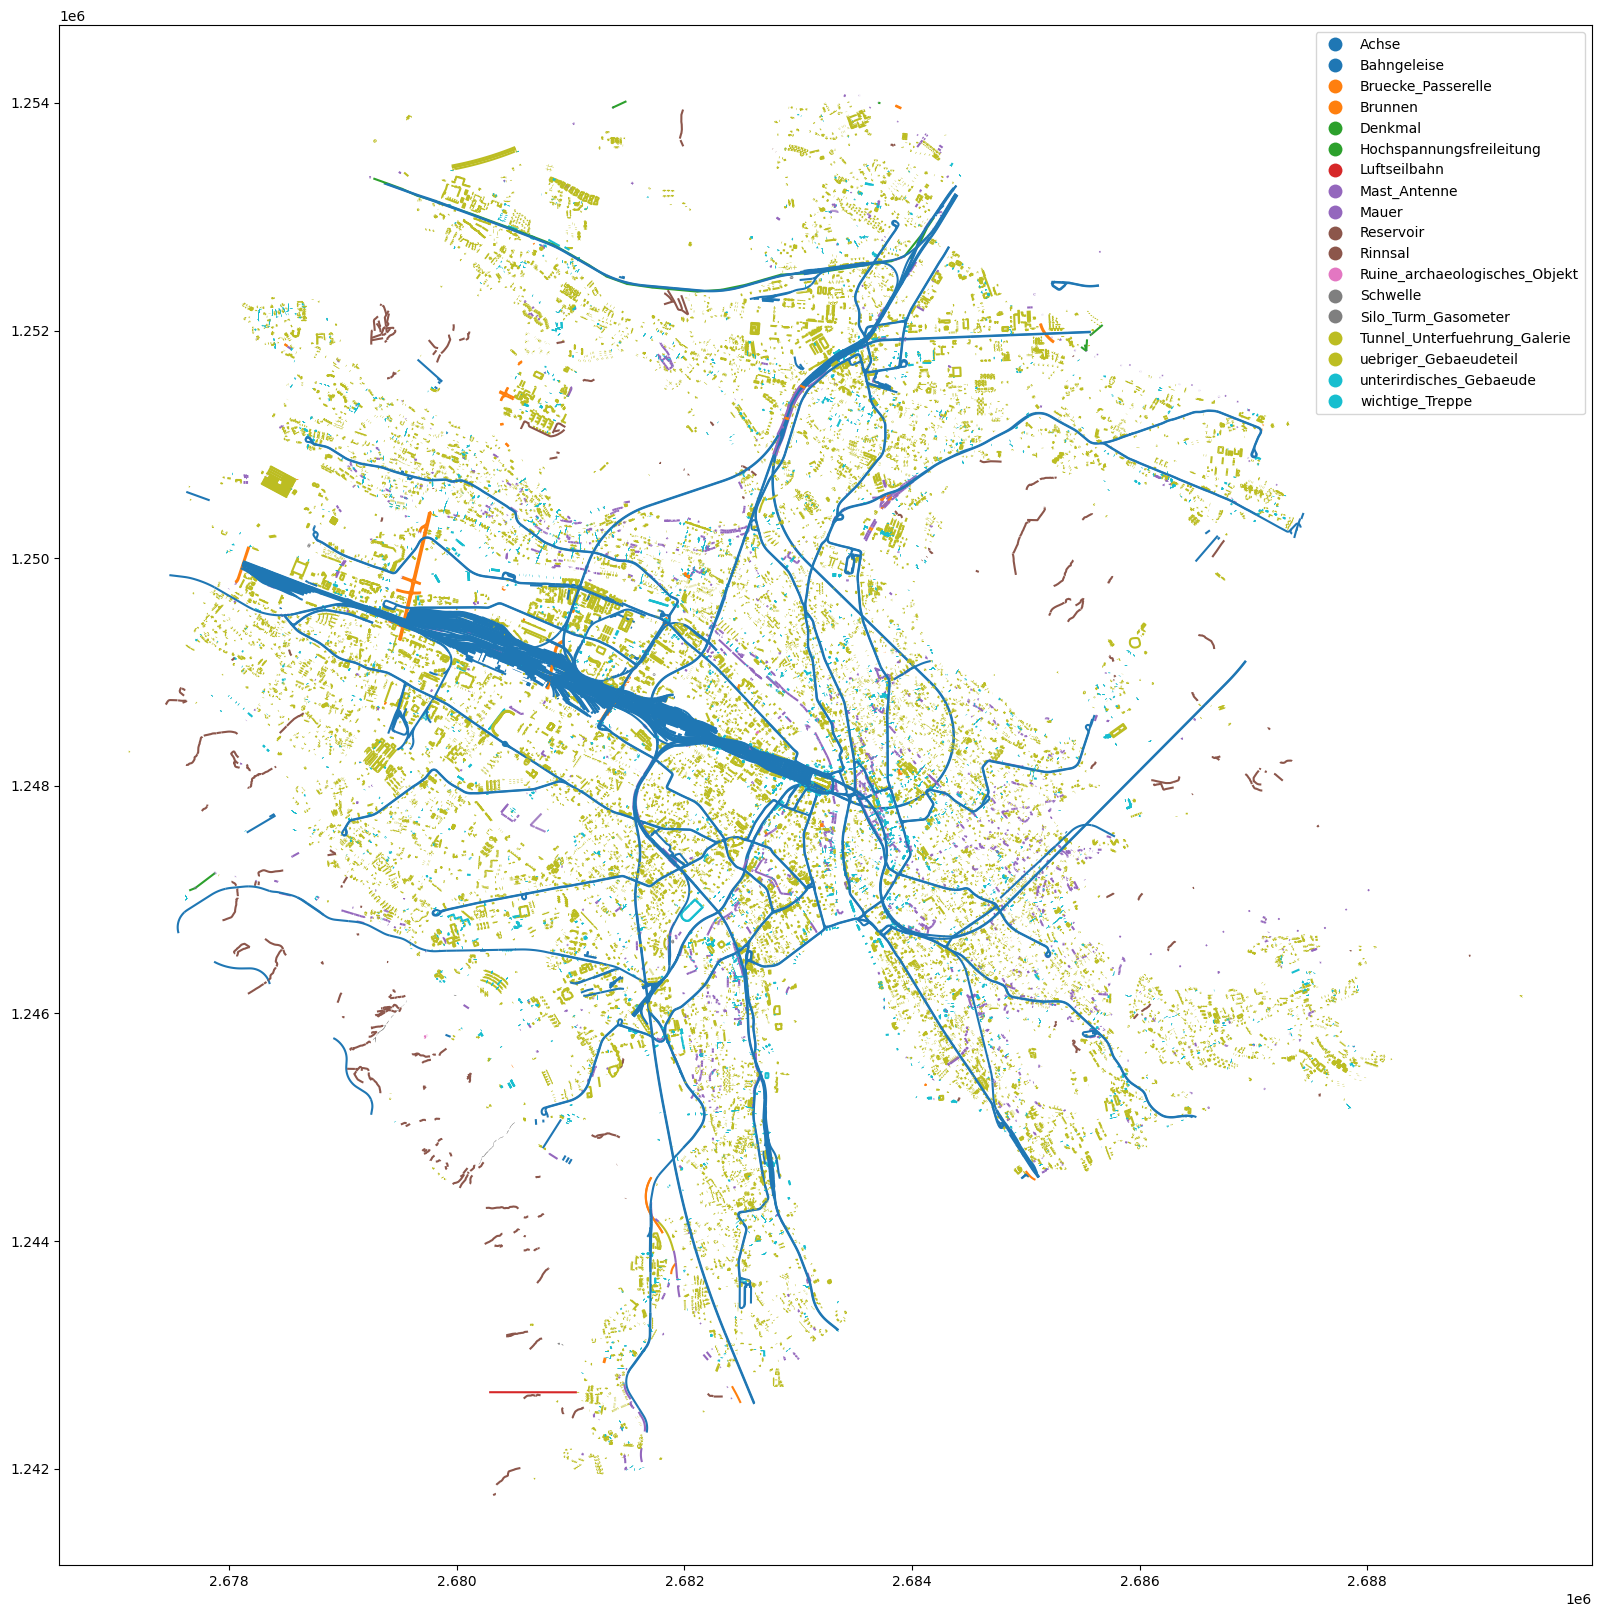

In [ ]:
georoazh.plot(column = "Art", figsize = (30,20), legend = True);

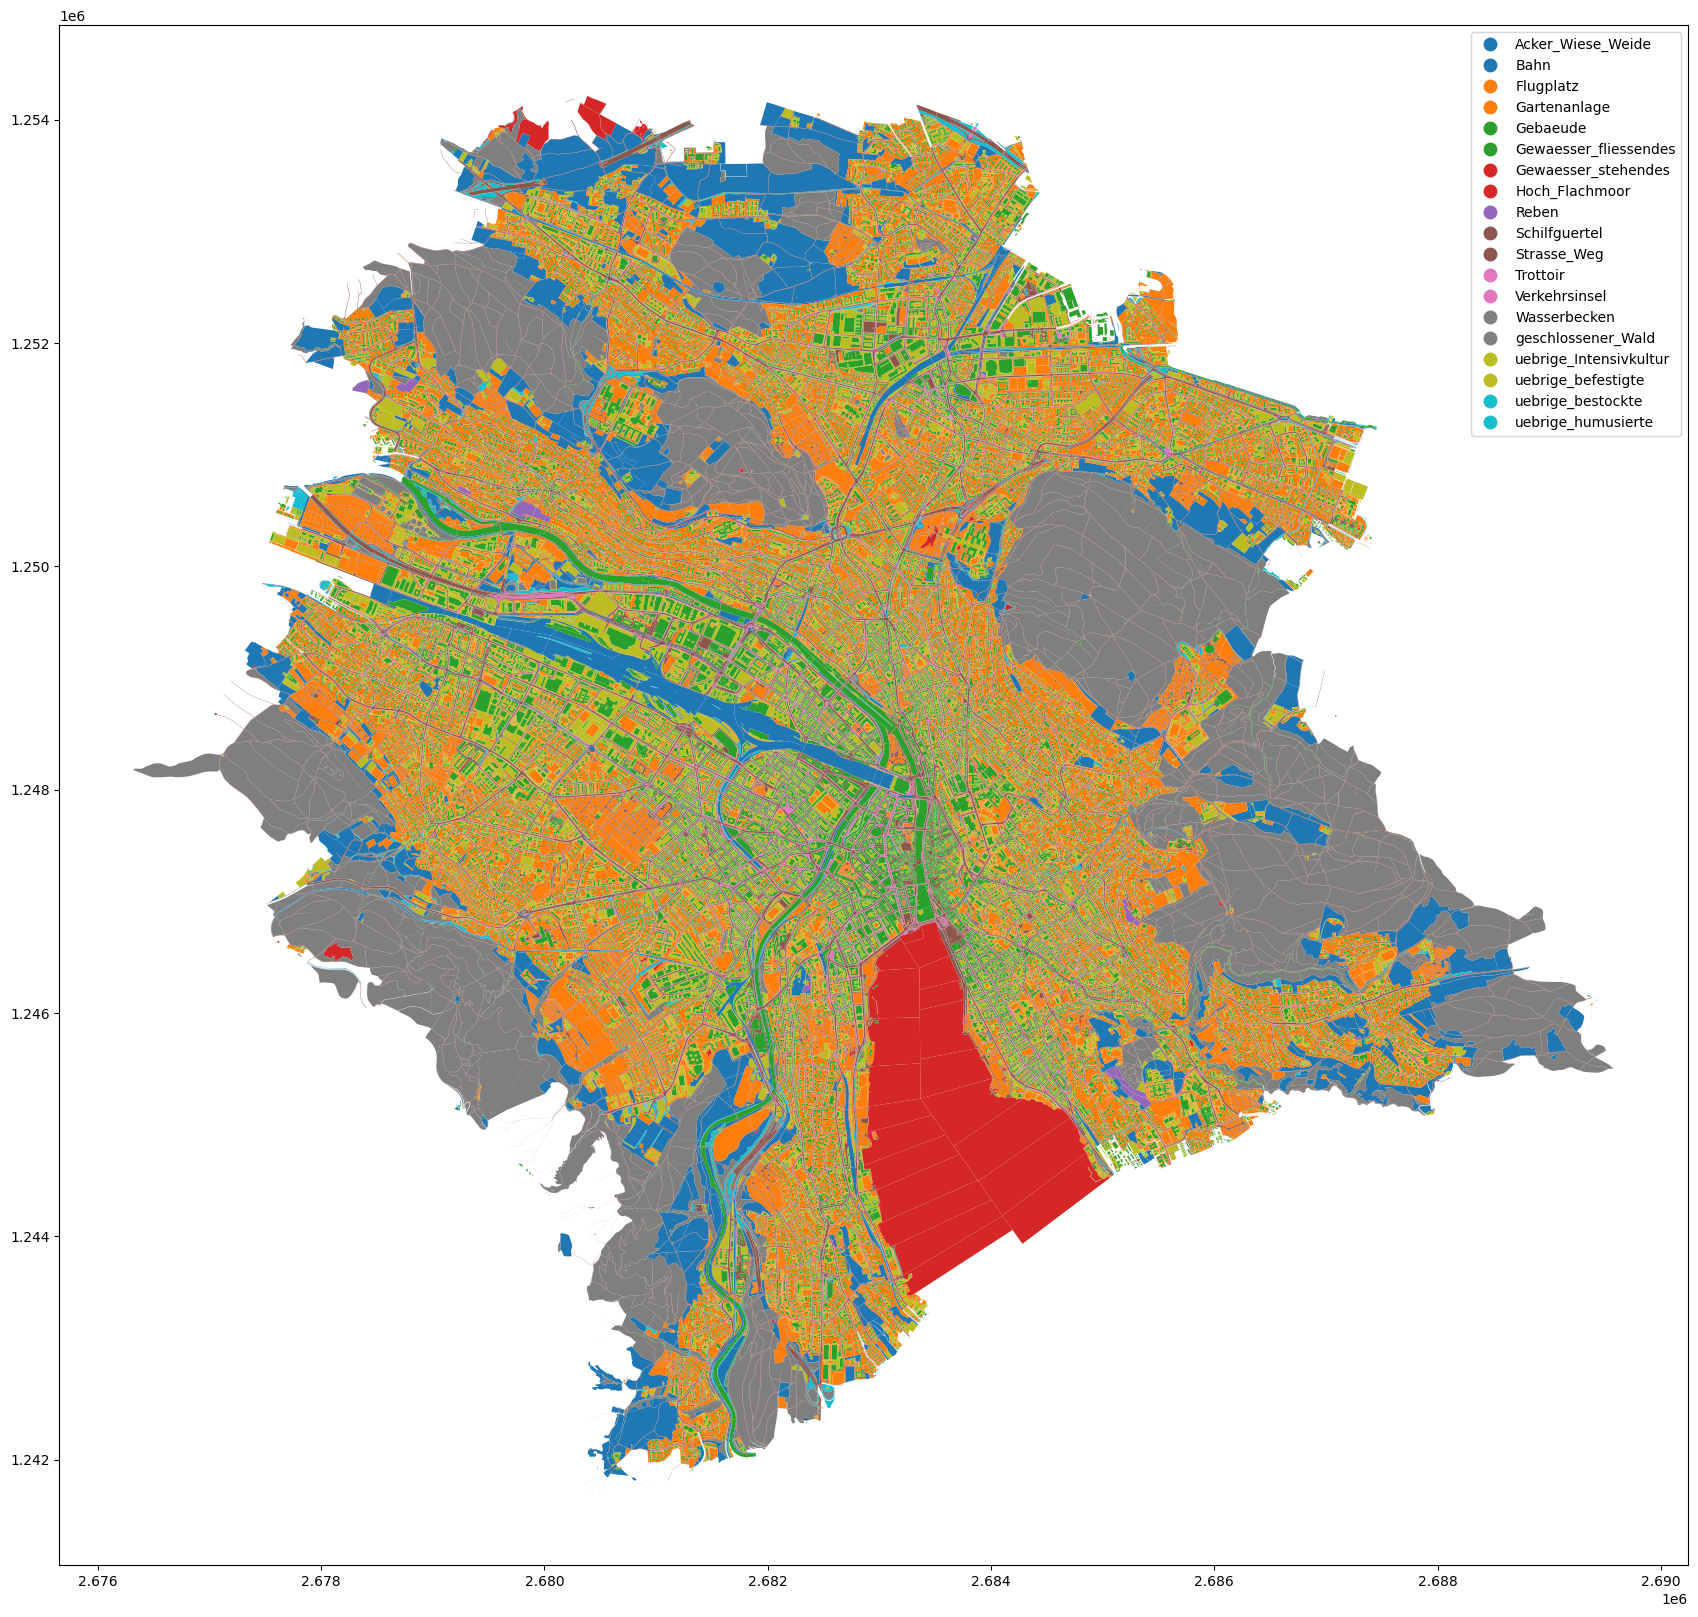

In [ ]:
geolcfzh.plot(column = "Art", figsize = (30,20), legend = True);

In [8]:
geolcf.Art.unique()

array(['uebrige_befestigte', 'Gartenanlage', 'Acker_Wiese_Weide',
       'uebrige_humusierte', 'Gebaeude', 'Trottoir', 'Abbau_Deponie',
       'uebrige_bestockte', 'Bahn', 'Hoch_Flachmoor', 'Schilfguertel',
       'uebrige_Intensivkultur', 'Reben', 'Fels', 'Geroell_Sand',
       'geschlossener_Wald', 'Wasserbecken', 'Flugplatz', 'Verkehrsinsel',
       'Gewaesser_fliessendes', 'Gewaesser_stehendes', 'Strasse_Weg'],
      dtype=object)

In [9]:
geobldzh = geolcfzh[geolcfzh.Art == 'Gebaeude']

In [10]:
georoazh = geolcfzh[(geolcfzh.Art == 'Trottoir') | (geolcfzh.Art == 'Verkhersinsel') | (geolcfzh.Art == 'Strasse_Weg')]

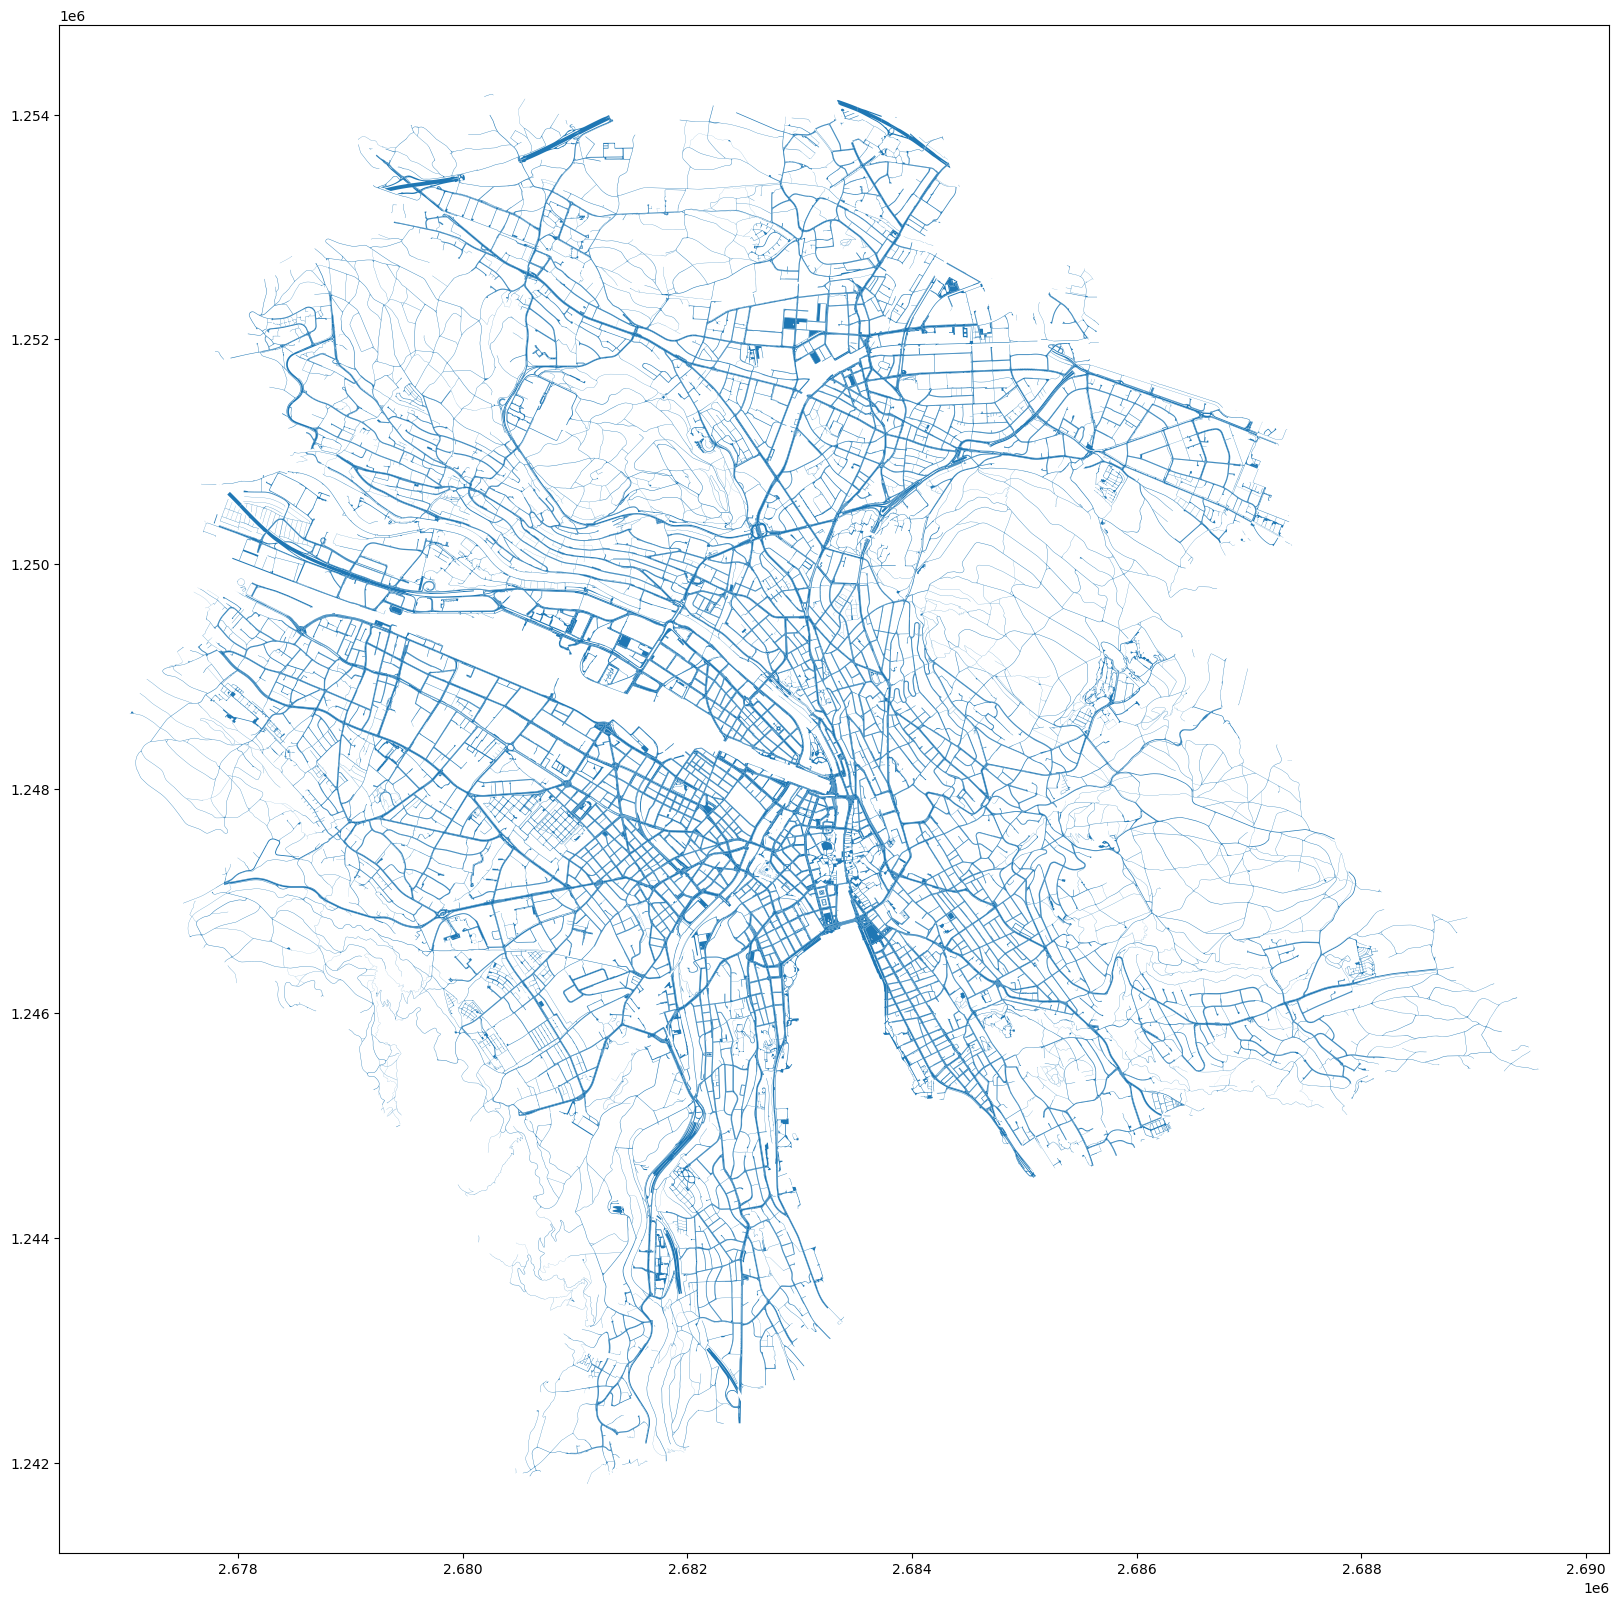

In [33]:
georoazh.plot(figsize=(20,20));

In [28]:
points_footprint = geobldzh.geometry.count_coordinates().values
print(f'95% of the building footprints have {np.quantile(points_footprint, 0.95)} or less points')
plt.hist(points_footprint, bins = 50, range=(0,100));

95% of the building footprints have 29.0 or less points
